In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import models, layers, losses, regularizers

# Data Understanding

In [2]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Show training data
print(train.shape) # rows, columns
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Show test data
print(test.shape) # rows, columns
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


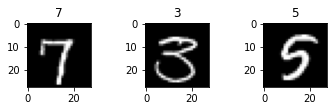

In [5]:
# Data visualization
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(
        train.iloc[i, 1:].values.reshape(28, 28), 
        cmap=plt.get_cmap('gray')
    )
    plt.title(train.iloc[i, 0]);

# Data Preparation

In [6]:
# Export input variables
x_train = train.iloc[:40000, 1:].values.astype('float32') / 255.0
x_validation = train.iloc[40000:, 1:].values.astype('float32') / 255.0
x_test = test.values.astype('float32') / 255.0

# Reshape input variables
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Export labels
y_train = train.iloc[:40000, 0].values.astype('int32')
y_validation = train.iloc[40000:, 0].values.astype('int32')

In [7]:
# Define data augmentation step
augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
])

# Modeling

In [8]:
# Build the model
model = keras.Sequential([
    augmentation,
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(
        filters = 192, 
        kernel_size = (5, 5), 
        activation = 'relu', 
        padding = 'same',
        kernel_regularizer = regularizers.l2(0.0005)
    ),
    layers.MaxPool2D(pool_size=(3, 3), strides=2),
    layers.Conv2D(
        filters = 384, 
        kernel_size = (3, 3), 
        activation = 'relu', 
        padding = 'same',
        kernel_regularizer = regularizers.l2(0.0005)
    ),
    layers.Conv2D(
        filters = 256, 
        kernel_size = (3, 3), 
        activation = 'relu', 
        padding = 'same',
        kernel_regularizer = regularizers.l2(0.0005)
    ),
    layers.Conv2D(
        filters = 256, 
        kernel_size = (3, 3), 
        activation = 'relu', 
        padding = 'same',
        kernel_regularizer = regularizers.l2(0.0005)
    ),
    layers.MaxPool2D(pool_size=(3, 3), strides=2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(
        units = 4096, 
        activation = 'relu',
        kernel_regularizer = regularizers.l2(0.0005)
    ),
    layers.Dropout(0.5),
    layers.Dense(
        units = 4096, 
        activation = 'relu',
        kernel_regularizer = regularizers.l2(0.0005)
    ),
    layers.Dense(units=10)
])

In [9]:
# Compile the model
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss = losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [10]:
# Create a callback for early stopping
earlystopping = keras.callbacks.EarlyStopping(verbose=1)

In [11]:
# Train the model
history_1 = model.fit(
    x = x_train, 
    y = y_train, 
    epochs = 100,
    batch_size = 100,
    callbacks = [earlystopping],
    validation_data = (x_validation, y_validation)
);

Epoch 1/100
400/400 [==============================] - 55s 136ms/step - loss: 5.8710 - accuracy: 0.7355 - val_loss: 5.0220 - val_accuracy: 0.9695
Epoch 2/100
400/400 [==============================] - 54s 136ms/step - loss: 4.8703 - accuracy: 0.9589 - val_loss: 4.6073 - val_accuracy: 0.9845
Epoch 3/100
400/400 [==============================] - 54s 136ms/step - loss: 4.4754 - accuracy: 0.9715 - val_loss: 4.2604 - val_accuracy: 0.9865
Epoch 4/100
400/400 [==============================] - 54s 136ms/step - loss: 4.1295 - accuracy: 0.9772 - val_loss: 3.9446 - val_accuracy: 0.9835
Epoch 5/100
400/400 [==============================] - 54s 136ms/step - loss: 3.8080 - accuracy: 0.9811 - val_loss: 3.6420 - val_accuracy: 0.9875
Epoch 6/100
400/400 [==============================] - 54s 136ms/step - loss: 3.5193 - accuracy: 0.9836 - val_loss: 3.3663 - val_accuracy: 0.9885
Epoch 7/100
400/400 [==============================] - 54s 136ms/step - loss: 3.2531 - accuracy: 0.9848 - val_loss: 3.1073 -

In [12]:
# Adjust the learning rate
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss = losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [13]:
# Continue training the model
history_2 = model.fit(
    x = x_train,
    y = y_train,
    epochs = 200,
    batch_size = 100,
    initial_epoch = history_1.epoch[-1] + 1,
    callbacks = [earlystopping],
    validation_data = (x_validation, y_validation)
);

Epoch 57/200
400/400 [==============================] - 54s 136ms/step - loss: 0.1235 - accuracy: 0.9958 - val_loss: 0.1257 - val_accuracy: 0.9955
Epoch 58/200
400/400 [==============================] - 55s 136ms/step - loss: 0.1207 - accuracy: 0.9962 - val_loss: 0.1246 - val_accuracy: 0.9940
Epoch 59/200
400/400 [==============================] - 54s 136ms/step - loss: 0.1202 - accuracy: 0.9966 - val_loss: 0.1263 - val_accuracy: 0.9935
Epoch 00059: early stopping


In [14]:
# Adjust the learning rate
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    loss = losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [15]:
# Continue training the model
history_3 = model.fit(
    x = x_train,
    y = y_train,
    epochs = 200,
    batch_size = 100,
    initial_epoch = history_2.epoch[-1] + 1,
    callbacks = [earlystopping],
    validation_data = (x_validation, y_validation)
);

Epoch 60/200
400/400 [==============================] - 55s 137ms/step - loss: 0.1185 - accuracy: 0.9970 - val_loss: 0.1250 - val_accuracy: 0.9930
Epoch 61/200
400/400 [==============================] - 54s 136ms/step - loss: 0.1185 - accuracy: 0.9970 - val_loss: 0.1246 - val_accuracy: 0.9930
Epoch 62/200
400/400 [==============================] - 54s 136ms/step - loss: 0.1187 - accuracy: 0.9967 - val_loss: 0.1244 - val_accuracy: 0.9930
Epoch 63/200
400/400 [==============================] - 55s 137ms/step - loss: 0.1180 - accuracy: 0.9969 - val_loss: 0.1243 - val_accuracy: 0.9930
Epoch 64/200
400/400 [==============================] - 55s 136ms/step - loss: 0.1181 - accuracy: 0.9971 - val_loss: 0.1242 - val_accuracy: 0.9930
Epoch 65/200
400/400 [==============================] - 55s 136ms/step - loss: 0.1187 - accuracy: 0.9967 - val_loss: 0.1238 - val_accuracy: 0.9935
Epoch 66/200
400/400 [==============================] - 55s 136ms/step - loss: 0.1176 - accuracy: 0.9972 - val_loss: 0

In [16]:
# Adjust the learning rate
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9),
    loss = losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [17]:
# Continue training the model
history_4 = model.fit(
    x = x_train,
    y = y_train,
    epochs = 200,
    batch_size = 100,
    initial_epoch = history_3.epoch[-1] + 1,
    callbacks = [earlystopping],
    validation_data = (x_validation, y_validation)
);

Epoch 68/200
400/400 [==============================] - 55s 137ms/step - loss: 0.1180 - accuracy: 0.9971 - val_loss: 0.1236 - val_accuracy: 0.9935
Epoch 69/200
400/400 [==============================] - 54s 136ms/step - loss: 0.1174 - accuracy: 0.9969 - val_loss: 0.1236 - val_accuracy: 0.9935
Epoch 00069: early stopping


# Evaluation

In [18]:
# Merge the logs
accuracy = history_1.history['accuracy'] \
    + history_2.history['accuracy'] \
    + history_3.history['accuracy'] \
    + history_4.history['accuracy']
val_accuracy = history_1.history['val_accuracy'] \
    + history_2.history['val_accuracy'] \
    + history_3.history['val_accuracy'] \
    + history_4.history['val_accuracy']
loss = history_1.history['loss'] \
    + history_2.history['loss'] \
    + history_3.history['loss'] \
    + history_4.history['loss']
val_loss = history_1.history['val_loss'] \
    + history_2.history['val_loss'] \
    + history_3.history['val_loss'] \
    + history_4.history['val_loss']

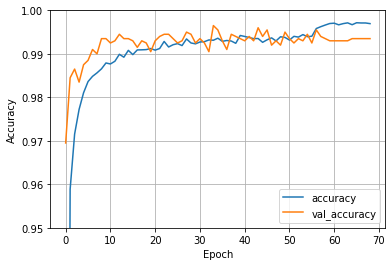

In [19]:
# Plot the learning curve
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1])
plt.grid()
plt.legend(loc='lower right');

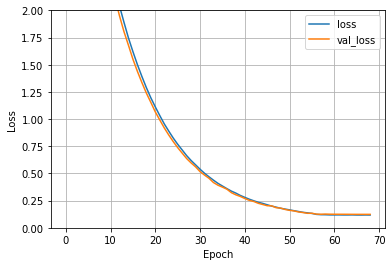

In [20]:
# Plot the learning curve
plt.plot(loss, label='loss')
plt.plot(val_loss, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2.0])
plt.grid()
plt.legend(loc='upper right');

## Submission

In [21]:
# Make prediction for test data
predictions = np.argmax(model.predict(x_test, batch_size=100), axis=-1)
submission=pd.DataFrame({
    "ImageId": list(range(1,len(predictions)+1)),
    "Label": predictions
    })
submission.to_csv("submission.csv", index=False, header=True)